In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [52]:
df=pd.read_csv("E:\Machinfy\secion 14/ames_housing_trimmed_processed.csv - ames_housing_trimmed_processed.csv.csv",sep=',',encoding='utf-8')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
MSSubClass              1460 non-null int64
LotFrontage             1460 non-null float64
LotArea                 1460 non-null int64
OverallQual             1460 non-null int64
OverallCond             1460 non-null int64
YearBuilt               1460 non-null int64
Remodeled               1460 non-null int64
GrLivArea               1460 non-null int64
BsmtFullBath            1460 non-null int64
BsmtHalfBath            1460 non-null int64
FullBath                1460 non-null int64
HalfBath                1460 non-null int64
BedroomAbvGr            1460 non-null int64
Fireplaces              1460 non-null int64
GarageArea              1460 non-null int64
MSZoning_FV             1460 non-null int64
MSZoning_RH             1460 non-null int64
MSZoning_RL             1460 non-null int64
MSZoning_RM             1460 non-null int64
Neighborhood_Blueste    1460 non-null int64
Neighborhoo

In [54]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65.0,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,1,0,0,0,1,208500
1,20,80.0,9600,6,8,1976,0,1262,0,1,...,0,1,0,0,0,0,0,0,1,181500
2,60,68.0,11250,7,5,2001,1,1786,1,0,...,0,0,0,0,1,0,0,0,1,223500
3,70,60.0,9550,7,5,1915,1,1717,1,0,...,0,0,0,0,1,0,0,0,1,140000
4,60,84.0,14260,8,5,2000,0,2198,1,0,...,0,0,0,0,1,0,0,0,1,250000


In [55]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
MSSubClass,1.000000,-0.215023,-0.139781,0.032628,-0.059316,0.027850,-0.058553,0.074853,0.003491,-0.002333,...,-0.006077,-0.466089,0.055913,0.080382,0.348910,0.183945,0.144635,-0.025338,-0.047611,-0.084284
LotFrontage,-0.215023,1.000000,0.100739,0.176561,-0.053457,0.036853,0.041838,0.220347,0.010514,-0.027856,...,-0.019618,0.044098,0.045254,-0.003624,-0.007530,-0.052201,-0.037233,-0.004834,0.016465,0.209624
LotArea,-0.139781,0.100739,1.000000,0.105806,-0.005636,0.014228,0.004274,0.263116,0.158155,0.048046,...,-0.033511,0.012717,0.014516,-0.011907,-0.012719,-0.045961,0.000452,0.012568,0.010431,0.263843
OverallQual,0.032628,0.176561,0.105806,1.000000,-0.091932,0.572323,-0.080468,0.593007,0.111098,-0.040150,...,-0.042654,-0.110087,0.014801,0.028116,0.279616,-0.090390,-0.027517,-0.076757,0.227129,0.790982
OverallCond,-0.059316,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.308884,-0.079686,-0.054942,0.117821,...,0.050198,-0.093219,0.078380,0.033261,-0.045514,0.030214,0.052549,0.068313,-0.073886,-0.077856
YearBuilt,0.027850,0.036853,0.014228,0.572323,-0.375983,1.000000,-0.414931,0.199010,0.187599,-0.038162,...,-0.122851,0.123255,-0.147244,-0.166574,0.187213,0.032490,0.023713,-0.180702,0.433060,0.522897
Remodeled,-0.058553,0.041838,0.004274,-0.080468,0.308884,-0.414931,1.000000,0.079804,-0.060905,0.039969,...,0.074947,-0.115451,0.077769,0.091286,-0.048074,-0.084101,-0.066399,0.093753,-0.218665,-0.021933
GrLivArea,0.074853,0.220347,0.263116,0.593007,-0.079686,0.199010,0.079804,1.000000,0.034836,-0.018918,...,-0.115954,-0.391650,0.188292,0.065048,0.468836,-0.166402,-0.058188,-0.030945,0.080466,0.708624
BsmtFullBath,0.003491,0.010514,0.158155,0.111098,-0.054942,0.187599,-0.060905,0.034836,1.000000,-0.147871,...,-0.053584,0.140496,-0.025090,-0.071443,-0.121269,0.178634,0.053474,-0.062920,0.120383,0.227122
BsmtHalfBath,-0.002333,-0.027856,0.048046,-0.040150,0.117821,-0.038162,0.039969,-0.018918,-0.147871,1.000000,...,0.005728,-0.021638,-0.017893,0.012184,-0.034929,0.015909,0.114935,0.025771,0.030344,-0.016844


(array([ 11.,  38.,  99., 232., 273., 218., 176., 104.,  93.,  58.,  42.,
         35.,  24.,  10.,  17.,   8.,   7.,   4.,   2.,   1.,   1.,   2.,
          1.,   0.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.        ,  58903.33333333,  82906.66666667, 106910.        ,
        130913.33333333, 154916.66666667, 178920.        , 202923.33333333,
        226926.66666667, 250930.        , 274933.33333333, 298936.66666667,
        322940.        , 346943.33333333, 370946.66666667, 394950.        ,
        418953.33333333, 442956.66666667, 466960.        , 490963.33333333,
        514966.66666667, 538970.        , 562973.33333333, 586976.66666667,
        610980.        , 634983.33333333, 658986.66666667, 682990.        ,
        706993.33333333, 730996.66666667, 755000.        ]),
 <a list of 30 Patch objects>)

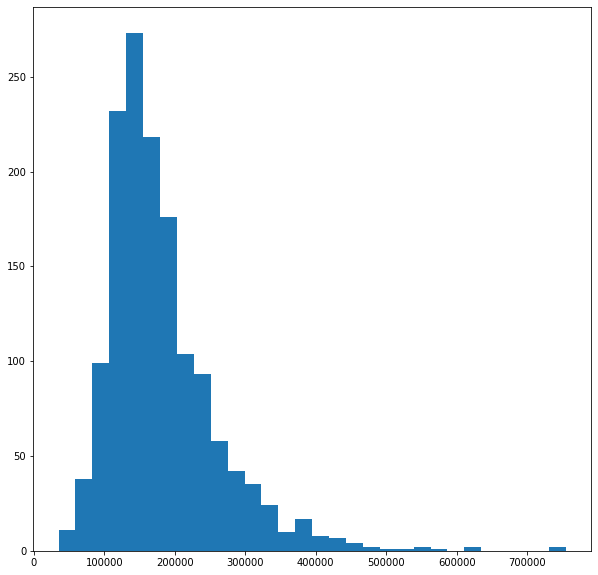

In [56]:
plt.figure(figsize=(10,10))
plt.hist(x=df['SalePrice'],bins=30)

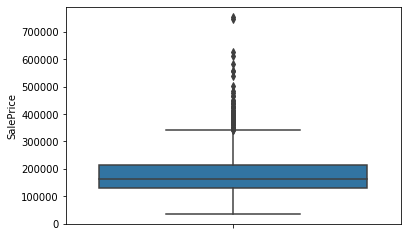

In [57]:
sns.boxplot(y=df['SalePrice'])

In [58]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [59]:
x=df.iloc[:,:-1].values
y=df['SalePrice'].values

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train , x_test ,y_train ,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [63]:
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
regressor=LinearRegression()

In [66]:
regressor.fit(x_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
regressor.score(x_train_scaled,y_train)

0.8643205464578119

In [68]:
regressor.score(x_test_scaled,y_test)

0.7823001633136246

In [69]:
pred=regressor.predict(x_test_scaled)

In [70]:
rmse=np.sqrt(((pred-y_test)**2).mean())

In [71]:
rmse

37910.898265666605

In [72]:
xg_reg=xgb.XGBRegressor(objective='reg:linear',n_estimators=10,seed=123)

In [73]:
xg_reg.fit(x_train_scaled,y_train)

[00:18:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
xg_reg.score(x_train_scaled,y_train)

0.9557712591766463

In [75]:
xg_reg.score(x_test_scaled,y_test)

0.7987891512940006

In [76]:
pred2=xg_reg.predict(x_test_scaled)

In [77]:
rmse2=np.sqrt(((pred2-y_test)**2).mean())

In [78]:
rmse2

36446.910440920976